In [1]:
import matplotlib.pyplot as plt
import numpy as np 
from cinnabar.plotting import _master_plot
import random

In [2]:
"""
Code for generating weakly and strongly correlating example plots for 
explaining good practices in data representation in AFE calculations.
"""

###############################################
def interpolate_data(data, limits=(-12, -8)):
	"""
	1-dimensional linear interpolation to set correlated data to range -15<->-5:
	"""

	return np.interp(data, (data.min(), data.max()), limits)





In [3]:
# generate toy datasets:
num_points = 45

xx = np.array([-0.51, 51.2])
yy = np.array([0.33, 51.6])
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
corr = 0.75
covs = [
		[stds[0]**2, stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr, stds[1]**2]
        ] 
m = np.random.multivariate_normal(means, covs, num_points).T

# rescale data to a realistic DDG range, also add two outliers:
x_data_raw = interpolate_data(m[0], limits=(-2.5, 2.5))
x_data = np.append(x_data_raw, [-2, 2])

y_data_raw = interpolate_data(m[1], limits=(-2.5, 2.5))
y_data = np.append(y_data_raw, [-2, -2])

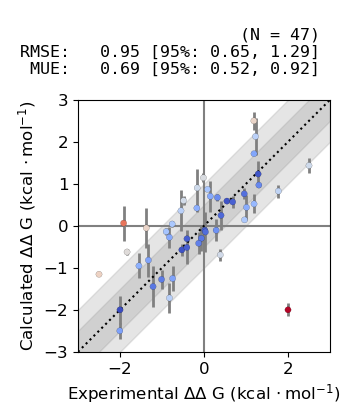

In [4]:
np.random.seed(42)

ddg_fig = _master_plot(
    x_data,
    y_data,
    yerr=np.random.sample(len(y_data)) * 0.5,
    quantity=r"$\Delta \Delta$ G",
    units=r"$\mathrm{kcal\,\cdot mol^{-1}}$",
    figsize=4.2,
    statistics=["RMSE", "MUE"]
)
ddg_fig.savefig("Figure_DDG.png", dpi=300, bbox_inches='tight')

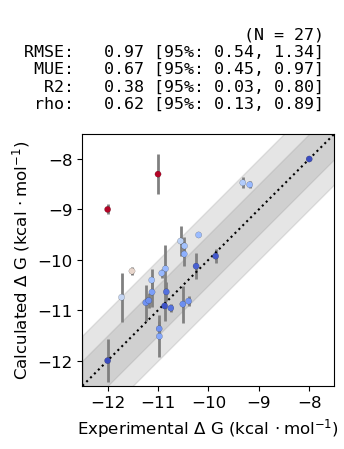

In [5]:
# repeat but for DG
# generate toy datasets:
num_points = 25

xx = np.array([-0.51, 51.2])
yy = np.array([0.33, 51.6])
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
corr = 0.85
covs = [
		[stds[0]**2, stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr, stds[1]**2]
        ] 
m = np.random.multivariate_normal(means, covs, num_points).T

# rescale data to a realistic DG range, also add two outliers:
x_data_raw = interpolate_data(m[0])
x_data = np.append(x_data_raw, [-11, -12])

y_data_raw = interpolate_data(m[1])
y_data = np.append(y_data_raw, [-8.3, -9])

np.random.seed(42)

ddg_fig = _master_plot(
    x_data,
    y_data,
    yerr=np.random.sample(len(y_data)) * 0.5,
    quantity=r"$\Delta$ G",
    units=r"$\mathrm{kcal\,\cdot mol^{-1}}$",
    figsize=4.2,
    statistics=["RMSE", "MUE", "R2", "rho"]
)
ddg_fig.savefig("Figure_DG.png", dpi=300, bbox_inches='tight')

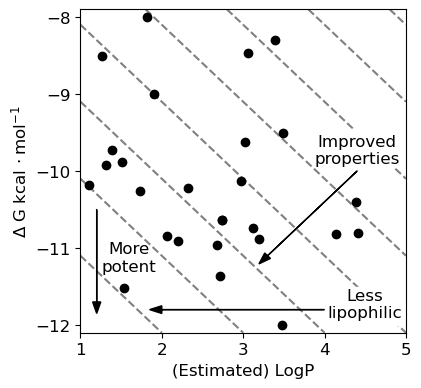

In [6]:
# finally make an LLE representation of the DG predictions
import matplotlib

f, ax = plt.subplots(figsize=(4.2,4.2))
np.random.seed(2)
logp_points = 1+np.random.sample(len(y_data)) * 4
ax.scatter(logp_points, y_data, color="black")

# make diagonal dashed lines
for i in range(-6, 12):
    ax.axline([i+0.4,-12.5], slope=-1, zorder=-1, color="gray", ls="--")

ax.set_xlim(1, 5)
ax.set_ylim(-12.1, -7.9)
ax.set_xlabel("(Estimated) LogP")
ax.set_ylabel(r"$\Delta$ G $\mathrm{kcal\,\cdot mol^{-1}}$")



plt.arrow(4.4, -10, -1.1, -1.1, head_width=0.1, color="black")
rect1 = matplotlib.patches.Rectangle((3.9,-9.95), 1., 0.5, color='white')
ax.add_patch(rect1)
ax.annotate("Improved\nproperties", xy=(4.4, -9.9), ha="center")

plt.arrow(4, -11.8, -2, 0, head_width=0.1, color="black")
rect1 = matplotlib.patches.Rectangle((4,-12), 1., 0.5, color='white')
ax.add_patch(rect1)
ax.annotate("Less\nlipophilic", xy=(4.5, -11.9), ha="center")

plt.arrow(1.2, -10.5, 0, -1.2, head_width=0.1, color="black")
ax.annotate("More\npotent", xy=(1.6, -11.3), ha="center")

plt.locator_params(axis='y', nbins=6)
plt.savefig("Figure_LLE.png", dpi=300, bbox_inches='tight')